In [1]:
import pytesseract
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
from pytesseract import Output 



1
2
3
4
5
opción
respuesta
A
B
c
D
E


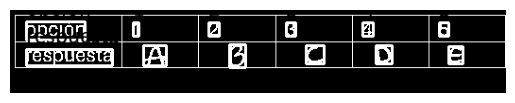

In [32]:

min_confidence = 40

def bouding_box(result, img, i, color = (255,100,0)):
    x = result['left'][i]
    y = result['top'][i]

    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x,y), (x + w, y + h) , color, 2)
    return x,y,img

# from PIL import ImageFont, ImageDraw, Image 
font = './Fonts/calibri.ttf'

def write_text(text,x,y, img, font, font_size = 25):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y - font_size), text, font = font)
    img = np.array(img_pil)
    return img

def aplication(path_img):
    img = cv2.imread(path_img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # gray = cv2.bitwise_not(gray)
 
    # img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9 )  
    img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9) #Es más recomendado el Gaussiano

    config = '--psm 11'
    img_copy = img.copy()
    img_copy = cv2.bitwise_not(img_copy)
    min_confidence = 40

    result = pytesseract.image_to_data(img, lang='spa', output_type= Output.DICT, config = config)
    min_confidence = 40
    for i in range(0, len(result['text'])):
        
        confidence= int(result['conf'][i])
        
        if confidence > min_confidence:
            text = result['text'][i]
            if not text.isspace():
                x, y, img = bouding_box(result, img_copy, i)
            # cv2.putText(img_copy, text, (x,y -10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
                img_copy = write_text(text, x, y, img_copy, font)
                print(text)

    plt.imshow(img_copy, cmap= 'gray');
    plt.axis(False)

path_img =r'image_test_7.jpg'
path_img = path_img.replace('\\', '/')

img = aplication(path_img)



Error with model --psm 0
********** --psm 1 **********


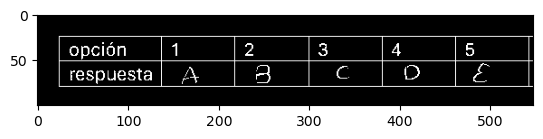

opción

respuesta


Error with model --psm 2
********** --psm 3 **********


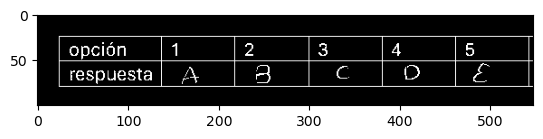

opción

respuesta


********** --psm 4 **********


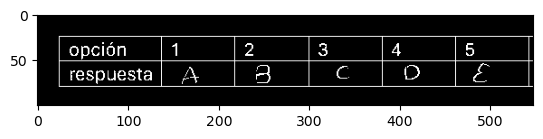

opción

1

2

3

4

5

respuesta

A

)

E

[)

Ê


********** --psm 5 **********


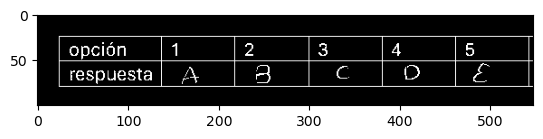

__
-m
bx

J
o
-m
q
-m
-

F

&
s8
S|3|
4b
s º

********** --psm 6 **********


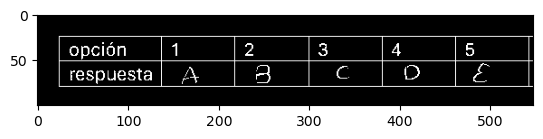

[opeión 11 |2 |3 T4 |5 |

********** --psm 7 **********


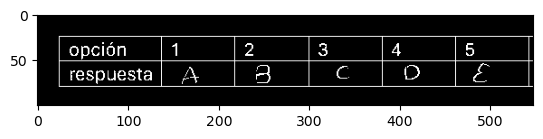


********** --psm 8 **********


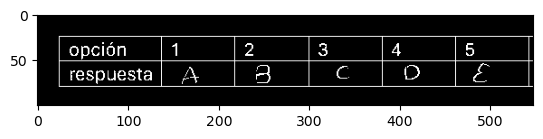

EA A o

********** --psm 9 **********


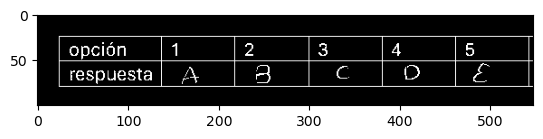

ES ta te to tA

********** --psm 10 **********


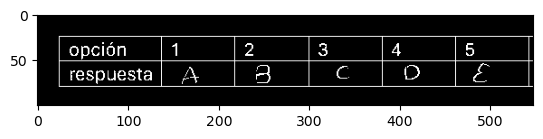


********** --psm 11 **********


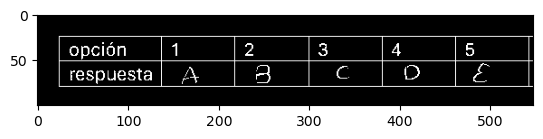

1

2

3

4

5

opción

respuesta

A

)

E

[)

Ê

********** --psm 12 **********


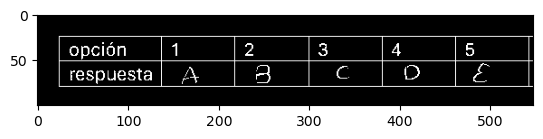

1

opción

respuesta

A

********** --psm 13 **********


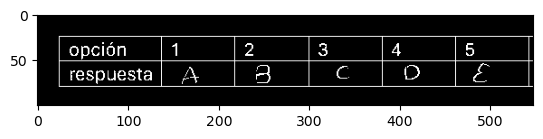

—ºrepscpiournesta1A28BCAD[



In [52]:

def inference_ocr(path_img):
    img = cv2.imread(path_img)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgb = cv2.bitwise_not(rgb)
    rgb[rgb > 127] = 255
    rgb[rgb < 127] = 0
    config_tesseract = [ f'--psm {i}' for i in range(14)]
    img_copy = rgb.copy()
    min_confidence = 40

    for i in range(len(config_tesseract)):
        config = f'--psm {i}'
        try:
            
            text = pytesseract.image_to_string(img, lang='por', config= config)
            print('*'*10, config, '*'*10)
            plt.imshow(rgb)
            plt.show()
            print(text)

        except pytesseract.TesseractError as e:
            print(f'Error with model {config}') 
        
        except Exception as e:
            print(f'Error with model {config}')

        except FileNotFoundError as e:
            print(f'Error with model {config}')

img = inference_ocr(path_img)


opción
1
2
3
4
5
respuesta
A
8
o
E


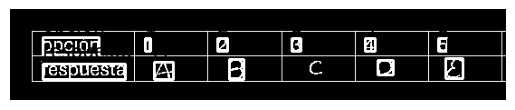

In [27]:

min_confidence = 40

def bouding_box(result, img, i, color = (255,100,0)):
    x = result['left'][i]
    y = result['top'][i]

    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x,y), (x + w, y + h) , color, 2)
    return x,y,img

# from PIL import ImageFont, ImageDraw, Image 
font = './Fonts/calibri.ttf'

def write_text(text,x,y, img, font, font_size = 25):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y - font_size), text, font = font)
    img = np.array(img_pil)
    return img

def aplication(path_img):
    img = cv2.imread(path_img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # gray = cv2.bitwise_not(gray)
 
    # img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9 )  
    img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9) #Es más recomendado el Gaussiano

    config = '--psm 11'
    img_copy = img.copy()
    img_copy = cv2.bitwise_not(img_copy)
    min_confidence = 40

    result = pytesseract.image_to_data(img, lang='spa', output_type= Output.DICT, config = config)
    min_confidence = 40
    for i in range(0, len(result['text'])):
        
        confidence= int(result['conf'][i])
        
        if confidence > min_confidence:
            text = result['text'][i]
            if not text.isspace():
                x, y, img = bouding_box(result, img_copy, i)
            # cv2.putText(img_copy, text, (x,y -10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
                img_copy = write_text(text, x, y, img_copy, font)
                print(text)

    plt.imshow(img_copy, cmap= 'gray');
    plt.axis(False)

path_img =r'image_test_8.jpg'
path_img = path_img.replace('\\', '/')

img = aplication(path_img)



opción
1
2
3
4
5
respuesta
A
8
c
o
E


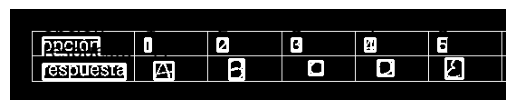

In [30]:

min_confidence = 40

def bouding_box(result, img, i, color = (255,100,0)):
    x = result['left'][i]
    y = result['top'][i]

    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x,y), (x + w, y + h) , color, 2)
    return x,y,img

# from PIL import ImageFont, ImageDraw, Image 
font = './Fonts/calibri.ttf'

def write_text(text,x,y, img, font, font_size = 25):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y - font_size), text, font = font)
    img = np.array(img_pil)
    return img

def aplication(path_img):
    img = cv2.imread(path_img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
 
    img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9 )  
    # img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9) #Es más recomendado el Gaussiano

    config = '--psm 11'
    img_copy = img.copy()
    img_copy = cv2.bitwise_not(img_copy)
    min_confidence = 40

    result = pytesseract.image_to_data(img, lang='spa', output_type= Output.DICT, config = config)
    min_confidence = 40
    for i in range(0, len(result['text'])):
        
        confidence= int(result['conf'][i])
        
        if confidence > min_confidence:
            text = result['text'][i]
            if not text.isspace():
                x, y, img = bouding_box(result, img_copy, i)
            # cv2.putText(img_copy, text, (x,y -10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
                img_copy = write_text(text, x, y, img_copy, font)
                print(text)

    plt.imshow(img_copy, cmap= 'gray');
    plt.axis(False)

path_img =r'image_test_8.jpg'
path_img = path_img.replace('\\', '/')

img = aplication(path_img)

